In [15]:
from perceptron import Perceptron
import numpy as np
import matplotlib.pyplot as plt
from data_generator import DataGenerator

In [17]:
N = 20
nd = 200
nmax = 100

alpha_range = np.arange(0.75, 3.0001, 0.25)
mean_range = np.arange(0.0, 2.0001, 0.5)
results = []

generator = DataGenerator(N)

for mean in mean_range:
    
    print(f"Doing {mean = }")
    
    success_runs = np.zeros(len(alpha_range))

    for i, alpha in enumerate(alpha_range):
        P = int(alpha * N)

        success_sum = 0
        for _ in range(nd):
            perceptron = Perceptron(N)
            X, Y = generator.generate(P, mean=mean)
            if perceptron.train(X, Y, nmax):
                success_sum += 1

        success_runs[i] = float(success_sum) / float(nd)
    
    results.append(success_runs)

Doing mean = 0.0
Doing mean = 0.5
Doing mean = 1.0
Doing mean = 1.5
Doing mean = 2.0


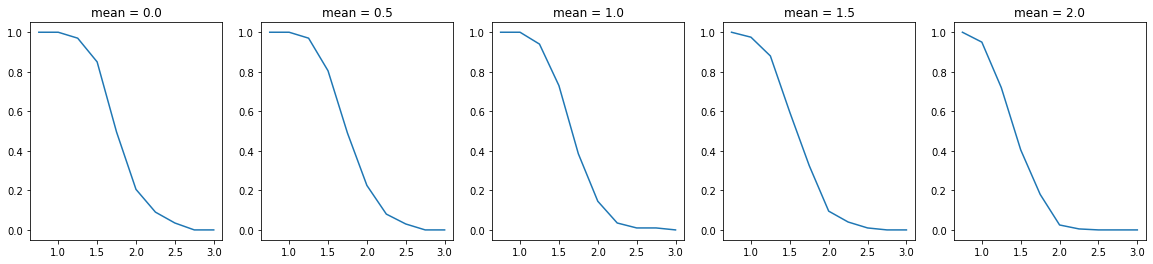

In [24]:
fig, plots = plt.subplots(1, len(mean_range), figsize=(20, 4))
for i, plot in enumerate(plots):
    plot.plot(alpha_range, results[i])
    plot.set_title(f"mean = {mean_range[i]:.1f}")

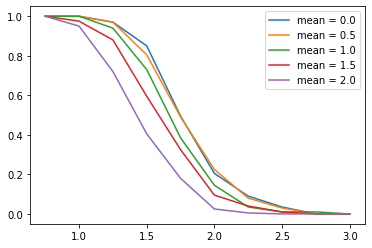

In [21]:
for i, plot in enumerate(plots):
    plt.plot(alpha_range, results[i], label=f"mean = {round(mean_range[i], 1)}")
plt.legend()